In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('BTC-EUR.csv')

In [3]:
# Define a function to identify the Shooting Star pattern
def is_shooting_star(row):
    # Check that the pattern exists
    if len(df) < 2 or row.name < 1:
        return False
    # Check that the pattern is a Shooting Star
    prev_close = df.loc[row.name - 1, 'Close']
    prev_high = df.loc[row.name - 1, 'High']
    prev_open = df.loc[row.name - 1, 'Open']
    curr_close = row['Close']
    curr_open = row['Open']
    curr_low = row['Low']  # Fix typo here
    curr_high = row['High']
    curr_body = abs(curr_close - curr_open)
    curr_range = curr_high - curr_low
    if (curr_close < curr_open) and ((curr_close - curr_low) >= (0.7 * curr_range)) and ((prev_high - prev_close) <= (0.3 * curr_body)) and ((prev_high - prev_open) <= (0.3 * curr_body)):
        return True
    else:
        return False

# Identify the Shooting Star patterns in the data
shooting_star_mask = df.apply(is_shooting_star, axis=1)
shooting_star_dates = df[shooting_star_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of Shooting Star patterns:')
for date in shooting_star_dates:
    print(date)

Dates of Shooting Star patterns:
2022-06-30


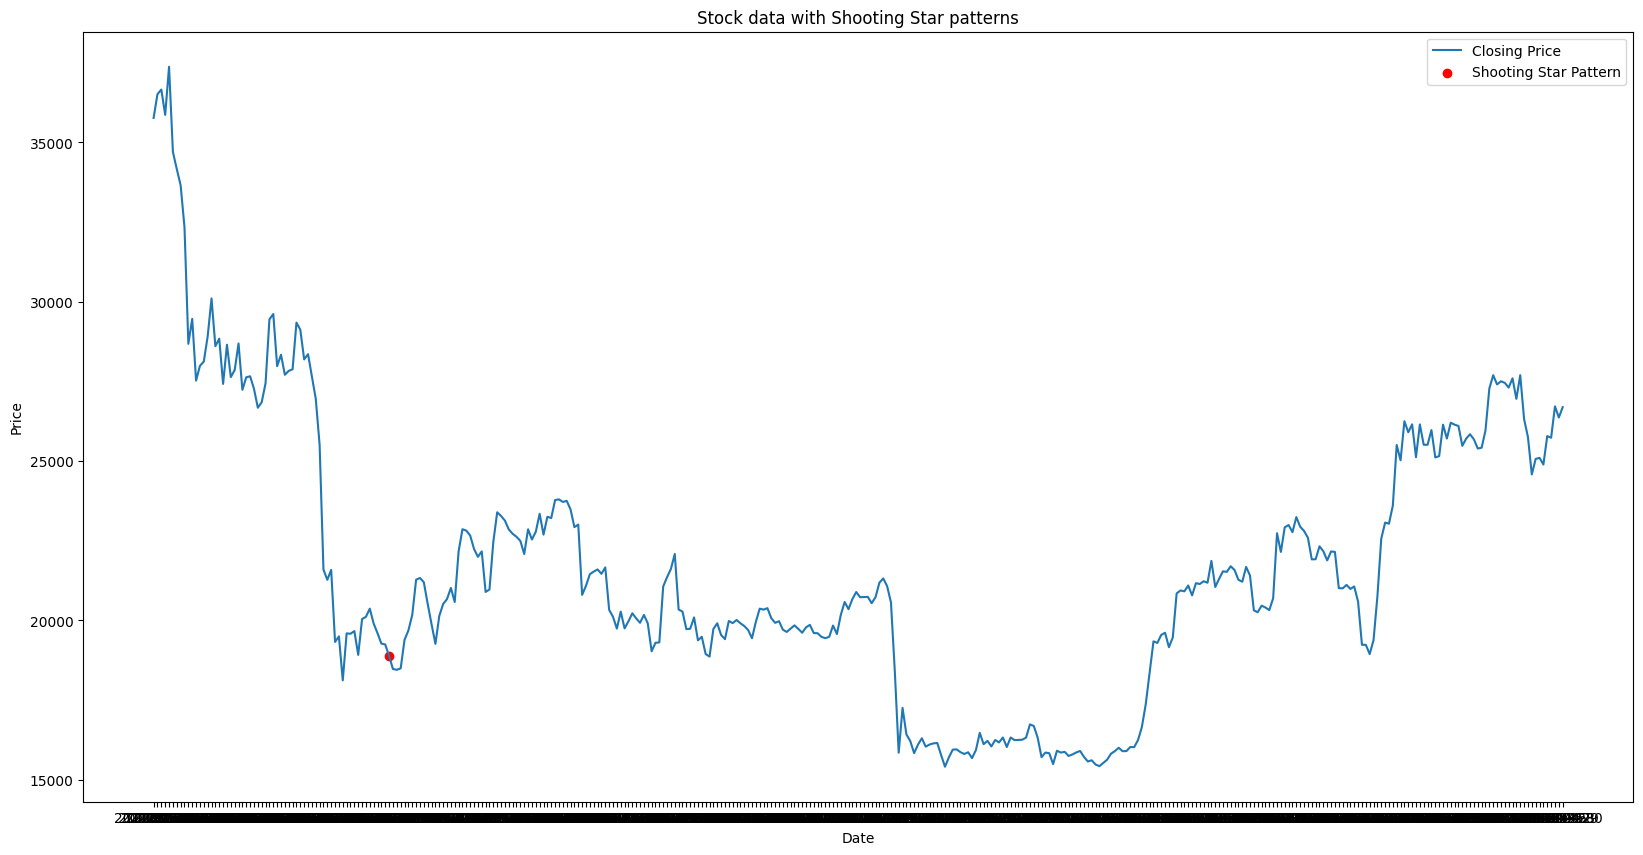

In [5]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(shooting_star_dates, df[shooting_star_mask]['Close'], color='r', label='Shooting Star Pattern')
ax.set_title('Stock data with Shooting Star patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()